#Calculate the Time

In [ ]:
import time

# # Record the start time
# start_time = time.time()

# # Your code block to measure execution time
# # For example, a simple loop
# for _ in range(1000000):
#     pass

# # Record the end time
# end_time = time.time()

# # Calculate the elapsed time
# elapsed_time = end_time - start_time

# print(f"Execution time: {elapsed_time:.4f} seconds")

#Download and Extract the Dataset 1

In [ ]:
!gdown --id 1gqSw7TfdcqN6DCpsNOr47YSqC2-_s-qv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1gqSw7TfdcqN6DCpsNOr47YSqC2-_s-qv
From (redirected): https://drive.google.com/uc?id=1gqSw7TfdcqN6DCpsNOr47YSqC2-_s-qv&confirm=t&uuid=433712cc-cd12-4474-b190-a0560eeb5423
To: /content/MNIST_Dataset_JPG_format.zip
100% 52.8M/52.8M [00:00<00:00, 53.1MB/s]


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('MNIST_Dataset_JPG_format.zip', 'r') as zip_ref:
    zip_ref.extractall('')

#Question 1

##Dataset and Dataloader using torch.utils.data.Dataset and DataLoader

In [ ]:
import torch
from torch.utils.data import Dataset,DataLoader
import os
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
#Paths to the dataset
train_dir_path = '/content/MNIST Dataset JPG format/MNIST - JPG - training'
test_dir_path = '/content/MNIST Dataset JPG format/MNIST - JPG - testing'

In [ ]:
class custom_train_dataset(Dataset):
  def __init__(self,images_path,images_label):
    self.image_path = images_path
    self.label = images_label

  def __len__(self):
    return len(self.image_path)

  def __getitem__(self,index):
    i_path = self.image_path[index]
    image = Tensor((mpimg.imread(i_path)).flatten())
    item = {'image':image,'label':torch.tensor(int(self.label[index]))}
    return item


In [ ]:
class custom_test_dataset(Dataset):
  def __init__(self,directory_path):
    self.image_path = [ (os.path.join(directory_path,class_name,image_name)) for class_name in os.listdir(directory_path) for image_name in os.listdir(os.path.join(directory_path,class_name)) ]
    self.label = [ int(class_name) for class_name in os.listdir(directory_path) for image_name in os.listdir(os.path.join(directory_path,class_name)) ]

  def __len__(self):
    return len(self.image_path)

  def __getitem__(self,index):
    i_path = self.image_path[index]
    image = Tensor((mpimg.imread(i_path)).flatten())
    item = {'image':image,'label':torch.tensor(int(self.label[index]))}
    return item

In [ ]:
#Making the lists for the images path and label to split the training data into training and validation
all_training_images_path = [ (os.path.join(train_dir_path,class_name,image_name)) for class_name in os.listdir(train_dir_path) for image_name in os.listdir(os.path.join(train_dir_path,class_name)) ]
all_training_images_label = [ int(class_name) for class_name in os.listdir(train_dir_path) for image_name in os.listdir(os.path.join(train_dir_path,class_name)) ]

#Making the training and validation split
images_train, images_validation, label_train, label_validation = train_test_split(all_training_images_path,all_training_images_label,train_size = 0.7,shuffle=True)

In [ ]:
#Creating the Training DataLoader object using custom dataset
train_mnist_dataset_custom = custom_train_dataset(images_path=images_train,images_label=label_train)
train_mnist_dataloader_custom = DataLoader(train_mnist_dataset_custom,batch_size=512,shuffle=True)

#Creating the Validation DataLoader object using custom dataset
validation_mnist_dataset_custom = custom_train_dataset(images_path=images_validation,images_label=label_validation)
validation_mnist_dataloader_custom = DataLoader(validation_mnist_dataset_custom,batch_size=512,shuffle=True)

#Creating the Test DataLoader object using custom dataset
test_mnist_dataset_custom = custom_test_dataset(directory_path = test_dir_path)
test_mnist_dataloader_custom = DataLoader(test_mnist_dataset_custom,batch_size=512,shuffle=False)

##Dataloader from scratch

In [ ]:
import numpy as np
from torch import Tensor

In [ ]:
class Simple_Train_DataLoader:
    def __init__(self, image_path,label, batch_size=32, shuffle=True):
      self.batch_size = batch_size
      self.shuffle = shuffle
      self.data = {'image_path': image_path, 'label': label}
      self.num_samples = len(self.data['image_path'])
      self.num_batches = int(np.ceil(self.num_samples / self.batch_size))
      if(self.shuffle):
        self.shuffle_data()

    def shuffle_data(self):
      indices = np.arange(self.num_samples)
      np.random.shuffle(indices)
      self.data['image_path'] = [self.data['image_path'][x] for x in indices]
      self.data['label'] = [self.data['label'][x] for x in indices]

    def get_batch(self):
      for batch_idx in range(self.num_batches):
        start_idx = batch_idx * self.batch_size
        end_idx = (batch_idx + 1) * self.batch_size

        batch_images_path = self.data['image_path'][start_idx:end_idx]
        batch_images = [Tensor(((mpimg.imread(x)).flatten())) for x in batch_images_path]
        batch_images = torch.stack(batch_images)
        batch_label = self.data['label'][start_idx:end_idx]
        batch_label = Tensor(batch_label)
        item = {'image':batch_images, 'label':batch_label}

        yield item


In [ ]:
class Simple_Test_DataLoader:
    def __init__(self, directory_path, batch_size=32):
      self.directory_path = directory_path
      self.batch_size = batch_size
      self.data = self.load_data()
      self.num_samples = len(self.data['image_path'])
      self.num_batches = int(np.ceil(self.num_samples / self.batch_size))

    def load_data(self):
      image_path = [ (os.path.join(self.directory_path,class_name,image_name)) for class_name in os.listdir(self.directory_path) for image_name in os.listdir(os.path.join(self.directory_path,class_name)) ]
      label = [ int(class_name) for class_name in os.listdir(self.directory_path) for image_name in os.listdir(os.path.join(self.directory_path,class_name)) ]
      return {'image_path': image_path,'label':label}

    def get_batch(self):
      for batch_idx in range(self.num_batches):
        start_idx = batch_idx * self.batch_size
        end_idx = (batch_idx + 1) * self.batch_size

        batch_images_path = self.data['image_path'][start_idx:end_idx]
        batch_images = [(Tensor(mpimg.imread(x)).flatten()) for x in batch_images_path]
        batch_images = torch.stack(batch_images)
        batch_label = self.data['label'][start_idx:end_idx]
        batch_label = Tensor(batch_label)
        item = {'image':batch_images, 'label':batch_label}

        yield item


In [ ]:
#Creating the Training DataLoader object from the scratch implementation of the DataLoader
train_mnist_dataloader_scratch = Simple_Train_DataLoader(images_train,label_train,batch_size=512,shuffle=True)

#Creating the Validation DataLoader object from the scratch implementation of the DataLoader
validation_mnist_dataloader_scratch = Simple_Train_DataLoader(images_validation,label_validation,batch_size=512,shuffle=True)

#Creating the Test DataLoader object from the scratch implementation of the DataLoader
test_mnist_dataloader_scratch = Simple_Test_DataLoader(directory_path=test_dir_path,batch_size=512)

##Calculate the time for both DataLoaders

In [ ]:
#Function to calculate the time required to load the Dataset
def calculate_time(dataloader_object):
  start_time = time.time()
  for x in dataloader_object:
    x
  end_time = time.time()
  elapsed_time = end_time - start_time

  print(f"Execution time: {elapsed_time:.4f} seconds")
  return elapsed_time

In [ ]:
calculate_time(train_mnist_dataloader_scratch.get_batch())

Execution time: 11.6139 seconds


11.613903760910034

In [ ]:
calculate_time(train_mnist_dataloader_custom)

Execution time: 12.2755 seconds


12.27550196647644

In [ ]:
calculate_time(test_mnist_dataloader_scratch.get_batch())

<ipython-input-13-051aef64dfd1>:20: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  batch_images = [(Tensor(mpimg.imread(x)).flatten()) for x in batch_images_path]


Execution time: 3.2034 seconds


3.203439235687256

In [ ]:
batch_size = [128, 256, 512, 1024]

In [ ]:
custom_loader_time = []
for i in batch_size:
  custom_loader = DataLoader(train_mnist_dataset_custom,batch_size=i,shuffle=True)
  custom_loader_time.append(calculate_time(custom_loader))

Execution time: 12.4877 seconds
Execution time: 13.6724 seconds
Execution time: 12.3895 seconds
Execution time: 12.6156 seconds


In [ ]:
scratch_loader_time = []
for i in batch_size:
  scratch_loader = Simple_Train_DataLoader(images_train,label_train,batch_size=i,shuffle=True)
  scratch_loader_time.append(calculate_time(scratch_loader.get_batch()))

Execution time: 11.3009 seconds
Execution time: 11.2789 seconds
Execution time: 10.6132 seconds
Execution time: 11.0931 seconds


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_lines(x, y1, y2):
    plt.plot(x, y1, label='Pytorch Dataloader')
    plt.plot(x, y2, label='Scratch Dataloader')

    plt.xlabel('Batch Size')
    plt.ylabel('Time taken')
    plt.title('Plot of Time taken')

    plt.legend()
    plt.show()

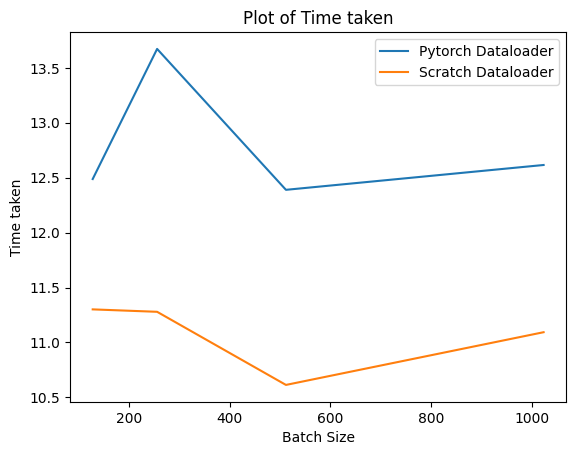

In [ ]:
plot_lines(batch_size,custom_loader_time,scratch_loader_time)

In [ ]:
#Creating the Training DataLoader object from the scratch implementation of the DataLoader
train_mnist_dataloader_scratch = Simple_Train_DataLoader(images_train,label_train,batch_size=1024,shuffle=True)

#Creating the Validation DataLoader object from the scratch implementation of the DataLoader
validation_mnist_dataloader_scratch = Simple_Train_DataLoader(images_validation,label_validation,batch_size=1024,shuffle=True)

#Creating the Test DataLoader object from the scratch implementation of the DataLoader
test_mnist_dataloader_scratch = Simple_Test_DataLoader(directory_path=test_dir_path,batch_size=1024)

#Question 2

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

##Network

In [ ]:
class Neural_Network_pytorch(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.fc1 = nn.Linear(input_size,512)
    self.fc2 = nn.Linear(512,400)
    self.fc3 = nn.Linear(400,256)
    self.fc4 = nn.Linear(256,128)
    self.fc5 = nn.Linear(128,64)
    self.fc6 = nn.Linear(64,output_size)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = torch.relu(self.fc4(x))
    x = torch.relu(self.fc5(x))
    x = self.fc6(x)
    return x

In [ ]:
model = Neural_Network_pytorch(784,10)

##Loss function and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.0003)

##Training function

In [ ]:
from tqdm import tqdm

In [ ]:
def train_model(train_loader,model,loss,optim):
  running_loss = 0
  num_correct = 0.0
  num_total = 0.0
  model.train()

  for data in tqdm(train_loader):
    batch_x = data['image']
    batch_y = data['label']
    batch_size = batch_x.size(0)
    num_total += batch_size
    batch_y = batch_y.long()
    batch_out = model(batch_x)
    batch_loss = loss(batch_out, batch_y)
    _, batch_pred = batch_out.max(dim=1)
    num_correct += (batch_pred == batch_y).sum(dim=0).item()
    running_loss += (batch_loss.item() * batch_size)

    optim.zero_grad()
    batch_loss.backward()
    optim.step()

  running_loss /= num_total
  train_accuracy = (num_correct/num_total)*100
  return running_loss, train_accuracy

##Evaluation function

In [ ]:
def evaluate_accuracy(dev_loader, model):
  num_correct = 0.0
  num_total = 0.0
  running_loss = 0.0
  model.eval()
  for data in tqdm(dev_loader):
    batch_x = data['image']
    batch_y = data['label']
    batch_size = batch_x.size(0)
    num_total += batch_size
    batch_y = batch_y.long()

    batch_out = model(batch_x)
    batch_loss = criterion(batch_out, batch_y)
    _, batch_pred = batch_out.max(dim=1)
    num_correct += (batch_pred == batch_y).sum(dim=0).item()
    running_loss += (batch_loss.item() * batch_size)

  running_loss /= num_total
  return 100 * (num_correct / num_total),running_loss

##Training Model

In [ ]:
train_acc = []
val_acc = []
test_acc = []
train_loss = []
validation_loss = []
testing_loss = []

In [ ]:
for epoch in tqdm(range(60)):  # loop over the dataset multiple times

    running_loss,train_accuracy = train_model(train_mnist_dataloader_scratch.get_batch(),model,criterion,optimizer)
    validation_accuracy,val_loss = evaluate_accuracy(validation_mnist_dataloader_scratch.get_batch(),model)
    testing_accuracy,test_loss = evaluate_accuracy(test_mnist_dataloader_scratch.get_batch(),model)
    train_acc.append(train_accuracy)
    test_acc.append(testing_accuracy)
    val_acc.append(validation_accuracy)
    train_loss.append(running_loss)
    validation_loss.append(val_loss)
    testing_loss.append(test_loss)

print('\nFinished Training')

  0%|          | 0/60 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:00,  1.15it/s]
2it [00:01,  1.07it/s]
3it [00:02,  1.30it/s]
4it [00:02,  1.63it/s]
5it [00:03,  1.74it/s]
6it [00:03,  1.85it/s]
7it [00:04,  1.95it/s]
8it [00:04,  1.95it/s]
9it [00:05,  1.98it/s]
10it [00:05,  2.16it/s]
11it [00:05,  2.35it/s]
12it [00:06,  2.52it/s]
13it [00:06,  2.63it/s]
14it [00:06,  2.71it/s]
15it [00:07,  2.81it/s]
16it [00:07,  2.84it/s]
17it [00:07,  2.89it/s]
18it [00:08,  2.94it/s]
19it [00:08,  2.95it/s]
20it [00:08,  2.98it/s]
21it [00:09,  3.02it/s]
22it [00:09,  3.02it/s]
23it [00:09,  3.00it/s]
24it [00:10,  2.99it/s]
25it [00:10,  3.01it/s]
26it [00:10,  2.98it/s]
27it [00:11,  2.98it/s]
28it [00:11,  2.99it/s]
29it [00:11,  2.98it/s]
30it [00:12,  2.98it/s]
31it [00:12,  2.99it/s]
32it [00:12,  2.91it/s]
33it [00:13,  2.93it/s]
34it [00:13,  2.94it/s]
35it [00:14,  2.92it/s]
36it [00:14,  2.95it/s]
37it [00:14,  2.97it/s]
38it [00:15,  2.94it/s]
39it [00:15,  2.79it/s]
40it [00:15,  2


Finished Training


In [ ]:
def plot_lines_loss(x, y1, y2,y3):
    plt.plot(y1, label='Train Loss')
    plt.plot(y2, label='Test Loss')
    plt.plot(y3, label='Validation Loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss ')

    plt.legend()
    plt.show()

In [ ]:
index = [i for i in range(1, 61)]

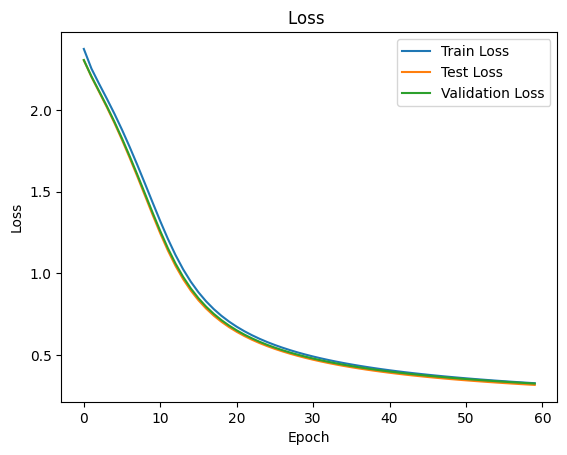

In [ ]:
plot_lines_loss(index,train_loss,testing_loss,validation_loss)

In [ ]:
def plot_lines_acc(x, y1, y2,y3):
    plt.plot(y1, label='Test Accuracy')
    plt.plot(y2, label='Validation Accuracy')
    plt.plot(y3, label='Training Accuracy')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy ')

    plt.legend()
    plt.show()

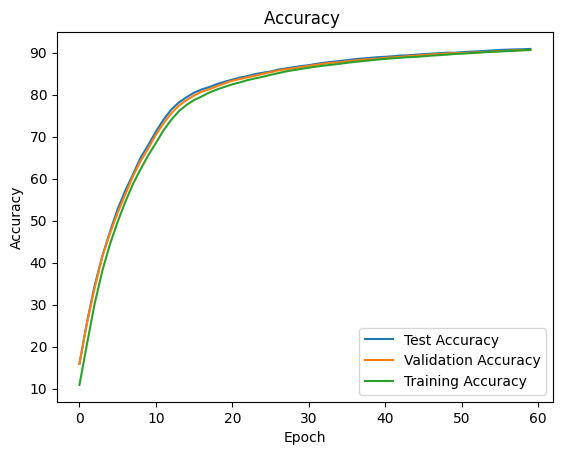

In [ ]:
plot_lines_acc(index,test_acc,val_acc,train_acc)

#Question 3

##Cross Entropy Loss Function from scratch

In [ ]:
class Cross_Entropy_Loss_Scratch:
  def forward_loss(self,predicted_labels,true_labels):
    total_loss = 0
    self.p_labels = []
    self.t_labels = []
    for i in range(len(predicted_labels)):
      self.p_labels.append(self.softmax_function_probabilities(predicted_labels[i]))
      self.t_labels.append(torch.eye(((predicted_labels[i]).size()[0]))[(true_labels[i].item())])
      index = torch.where(self.t_labels[i] == 1)[0]
      loss = self.t_labels[i][index] * torch.log(self.p_labels[i][index])
      total_loss = total_loss - loss
    return (total_loss / predicted_labels.size()[0])

  def backward_loss(self):
    dummy = torch.zeros_like(self.p_labels)
    for i in range(len(self.p_labels)):
      for k,j in enumerate(self.p_labels[i]):
        dummy[i][k] = self.p_labels[i][k] - self.t_labels[i][k]
    return dummy

  def softmax_function_probabilities(self,input):
    exp_inputs = torch.exp(input)
    out_inputs = exp_inputs / sum(exp_inputs)
    return out_inputs

  def one_hot_encode(class_index, num_classes):
    return torch.eye(num_classes)[class_index]

In [ ]:
criterion_scratch = Cross_Entropy_Loss_Scratch()

##Relu Activation function from scratch

In [ ]:
class Relu_Scratch:
  def forward_a(self,input_):
    self.max_input = []
    for i in range(len(input_)):
      temp = []
      for k in range(len(input_[i])):
        temp.append(np.maximum(0,int(input_[i][k])))
      temp_tensor = Tensor(temp)
      self.max_input.append(temp_tensor)
    return torch.stack(self.max_input)

  def backward_a(self,input_):
    output = []
    for i in range(len(input_)):
      temp = []
      for k in range(len(input_[i])):
        temp.append(np.where(int(self.max_input[i][k]) > 0, int(input_[i][k]), 0.0))
      temp_tensor = Tensor(temp)
      output.append(temp_tensor)
    return torch.stack(output)


In [ ]:
relu_scratch = Relu_Scratch()

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss,train_accuracy = train_model(train_mnist_dataloader_custom,model,criterion,optimizer)
    validation_accuracy = evaluate_accuracy(validation_mnist_dataloader_custom,model)
    testing_accuracy = evaluate_accuracy(test_mnist_dataloader_custom,model)
    print('Running Loss :- ',running_loss)
    print('Train Accuracy :-',train_accuracy)
    print('Validation Accuracy :-',validation_accuracy)
    print('Testing Accuracy :-',testing_accuracy)

print('\nFinished Training')

100%|██████████| 83/83 [11:01<00:00,  7.98s/it]


Running Loss :-  2.3342433668772378
Train Accuracy :- 12.607142857142858
Validation Accuracy :- 12.227777777777778
Testing Accuracy :- 12.620000000000001


100%|██████████| 83/83 [11:36<00:00,  8.39s/it]


Running Loss :-  2.3342447320847284
Train Accuracy :- 12.607142857142858
Validation Accuracy :- 12.227777777777778
Testing Accuracy :- 12.620000000000001

Finished Training


##Linear layer from scratch

In [ ]:
class Linear_Scratch:
  def __init__(self,input_dimension,output_dimension):
    self.weight = (torch.rand(output_dimension,input_dimension)-0.5)/torch.sqrt(input_dimension)
    self.bias = torch.zeros((output_dimension,1))

    self.weight_grad = torch.zeros_like(self.weight)
    self.bias_grad = torch.zeros_like(self.bias)

  def forward_l(self,input_):
    self.input_ = []
    for i in range(len(input_)):
      self.input_.append(torch.dot(self.weight,input_))
    return torch.stack(self.input_)

  def backward_l(self,input_):
    temp =[]
    for i in range(len(input_)):
      self.weight_grad += torch.dot(input_,self.x.T)
      temp.append(torch.dot(self.weight.T,input_))
    return torch.stack(temp)

  def update_l(self,alpha):
    self.weight = self.weight - alpha*self.weight_grad
    self.reset_l

  def reset_l(self):
    self.weight_grad = torch.zeros_like(self.weight)

##Model from Scratch

In [ ]:
class Neural_Network_scratch(Linear_Scratch,Relu_Scratch,Cross_Entropy_Loss_Scratch):
  def __init__(self,input_size,output_size,act,lr):
    self.alpha = lr
    self.layer1 = Linear_Scratch(input_size,500)
    self.layer2 = Linear_Scratch(500,500)
    self.layer3 = Linear_Scratch(500,500)
    self.layer4 = Linear_Scratch(500,500)
    self.layer5 = Linear_Scratch(500,500)
    self.layer6 = Linear_Scratch(500,output_size)
    self.act = Relu_Scratch()
    self.cross_ent_loss = Cross_Entropy_Loss_Scratch()

  def forward(self,input_):
    out = self.layer1.forward_l(input_)
    out = self.act.forward_a(out)
    out = self.layer2.forward_l(out)
    out = self.act.forward_a(out)
    out = self.layer3.forward_l(out)
    out = self.act.forward_a(out)
    out = self.layer4.forward_l(out)
    out = self.act.forward_a(out)
    out = self.layer5.forward_l(out)
    out = self.act.forward_a(out)
    out = self.layer6.forward_l(out)
    return out

  def backward(self):
    x = self.cross_ent_loss.backward_loss()
    x = self.layer6.backward_l(x)
    x = self.act.backward_a(x)
    x = self.layer5.backward_l(x)
    x = self.act.backward_a(x)
    x = self.layer4.backward_l(x)
    x = self.act.backward_a(x)
    x = self.layer3.backward_l(x)
    x = self.act.backward_a(x)
    x = self.layer2.backward_l(x)
    x = self.act.backward_a(x)
    self.layer1.backward_l(x)

  def update(self):
    self.layer6.update_l(self.alpha)
    self.layer5.update_l(self.alpha)
    self.layer4.update_l(self.alpha)
    self.layer3.update_l(self.alpha)
    self.layer2.update_l(self.alpha)
    self.layer1.update_l(self.alpha)

  def reset(self):
    self.layer6.reset_l()
    self.layer5.reset_l()
    self.layer4.reset_l()
    self.layer3.reset_l()
    self.layer2.reset_l()
    self.layer1.reset_l()

  def loss(self,pred,index):
    true = np.zeros_like(pred)
    for i in range(len(pred)):
      true[i][int(index[0][0])] = 1
    loss = self.cross_ent_loss.forward_loss(pred,true)
    return loss

#Question 4

##Network

In [ ]:
class Neural_Network_pytorch(nn.Module):
  def __init__(self,input_size,output_size):
    super().__init__()
    self.fc1 = nn.Linear(input_size,512)
    self.fc2 = nn.Linear(512,400)
    self.fc3 = nn.Linear(400,256)
    self.fc4 = nn.Linear(256,128)
    self.fc5 = nn.Linear(128,64)
    self.fc6 = nn.Linear(64,output_size)

  def forward(self, x):
    x = torch.sigmoid(self.fc1(x))
    x = torch.sigmoid(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    x = torch.sigmoid(self.fc4(x))
    x = torch.sigmoid(self.fc5(x))
    x = self.fc6(x)
    return x

In [ ]:
model = Neural_Network_pytorch(784,10)

##Loss function and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.0003)

##Training function

In [ ]:
from tqdm import tqdm

In [ ]:
def train_model(train_loader,model,loss,optim):
  running_loss = 0
  num_correct = 0.0
  num_total = 0.0
  model.train()

  for data in tqdm(train_loader):
    batch_x = data['image']
    batch_y = data['label']
    batch_size = batch_x.size(0)
    num_total += batch_size
    batch_y = batch_y.long()
    batch_out = model(batch_x)
    batch_loss = loss(batch_out, batch_y)
    _, batch_pred = batch_out.max(dim=1)
    num_correct += (batch_pred == batch_y).sum(dim=0).item()
    running_loss += (batch_loss.item() * batch_size)

    optim.zero_grad()
    batch_loss.backward()
    optim.step()

  running_loss /= num_total
  train_accuracy = (num_correct/num_total)*100
  return running_loss, train_accuracy

##Evaluation function

In [ ]:
def evaluate_accuracy(dev_loader, model):
  num_correct = 0.0
  num_total = 0.0
  running_loss = 0.0
  model.eval()
  for data in tqdm(dev_loader):
    batch_x = data['image']
    batch_y = data['label']
    batch_size = batch_x.size(0)
    num_total += batch_size
    batch_y = batch_y.long()

    batch_out = model(batch_x)
    batch_loss = criterion(batch_out, batch_y)
    _, batch_pred = batch_out.max(dim=1)
    num_correct += (batch_pred == batch_y).sum(dim=0).item()
    running_loss += (batch_loss.item() * batch_size)

  running_loss /= num_total
  return 100 * (num_correct / num_total),running_loss

##Training Model

In [ ]:
train_acc = []
val_acc = []
test_acc = []
train_loss = []
validation_loss = []
testing_loss = []

In [ ]:
for epoch in range(60):  # loop over the dataset multiple times

    running_loss,train_accuracy = train_model(train_mnist_dataloader_scratch.get_batch(),model,criterion,optimizer)
    validation_accuracy,val_loss = evaluate_accuracy(validation_mnist_dataloader_scratch.get_batch(),model)
    testing_accuracy,test_loss = evaluate_accuracy(test_mnist_dataloader_scratch.get_batch(),model)
    train_acc.append(train_accuracy)
    test_acc.append(testing_accuracy)
    val_acc.append(validation_accuracy)
    train_loss.append(running_loss)
    validation_loss.append(val_loss)
    testing_loss.append(test_loss)

print('\nFinished Training')

In [ ]:
def plot_lines_loss(x, y1, y2,y3):
    plt.plot(y1, label='Train Loss')
    plt.plot(y2, label='Test Loss')
    plt.plot(y3, label='Validation Loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss ')

    plt.legend()
    plt.show()

In [ ]:
index = [i for i in range(1, 61)]

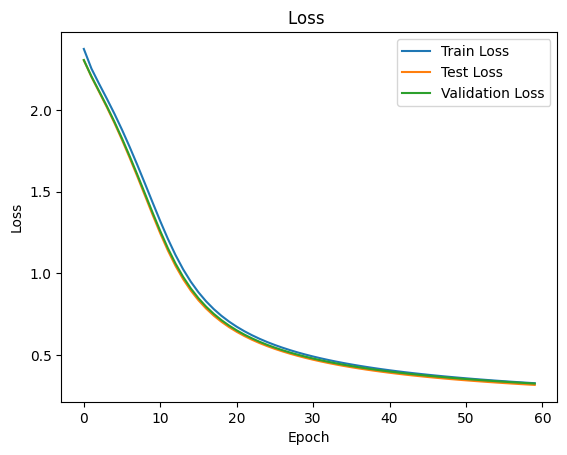

In [ ]:
plot_lines_loss(index,train_loss,testing_loss,validation_loss)

In [ ]:
def plot_lines_acc(x, y1, y2,y3):
    plt.plot(y1, label='Test Accuracy')
    plt.plot(y2, label='Validation Accuracy')
    plt.plot(y3, label='Training Accuracy')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy ')

    plt.legend()
    plt.show()

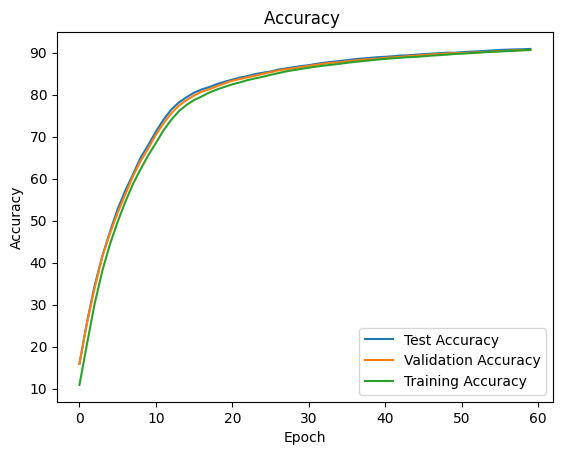

In [ ]:
plot_lines_acc(index,test_acc,val_acc,train_acc)